Exploratory Data Analysis Exercise 04

In [2]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


Read the CSV file and show data

In [3]:
data = pd.read_csv('C:/Users/raque/OneDrive/Documentos/Python/Análise Exploratória de Dados/Trabalho Final/pbaed_ex4.csv')
print(data)

         A      B      C      D
0    146.2  147.2  146.6  146.8
1    146.8  146.9  146.8  146.8
2    147.4  147.5  147.1  147.3
3    146.6  147.1  147.4  147.2
4    147.3  146.9  147.6  147.4
..     ...    ...    ...    ...
139  146.6  145.9  146.0  146.5
140  146.0  146.4  145.9  146.4
141  146.6  146.6  146.4  146.2
142  146.2  146.8  146.7  146.7
143  146.8  147.3  147.0  146.7

[144 rows x 4 columns]


Center data

In [4]:
cent_data = (data.mean() - data)/data.std()
print(cent_data)


            A         B         C         D
0   -0.390827 -1.358675 -0.508693 -0.769105
1   -1.045236 -1.043281 -0.735128 -0.769105
2   -1.699644 -1.674069 -1.074781 -1.316295
3   -0.827100 -1.253544 -1.414434 -1.206857
4   -1.590576 -1.043281 -1.640869 -1.425733
..        ...       ...       ...       ...
139 -0.827100  0.008031  0.170613 -0.440792
140 -0.172691 -0.517625  0.283830 -0.331354
141 -0.827100 -0.727888 -0.282258 -0.112478
142 -0.390827 -0.938150 -0.621911 -0.659668
143 -1.045236 -1.463806 -0.961563 -0.659668

[144 rows x 4 columns]


Matrix of covariances of standardized data

In [5]:
cent_matrix = cent_data.cov()
print(round(cent_matrix,2))

      A     B     C     D
A  1.00  0.86  0.55  0.60
B  0.86  1.00  0.59  0.64
C  0.55  0.59  1.00  0.88
D  0.60  0.64  0.88  1.00


Eigenvalues of the covariance matrix

In [6]:
[eigval, eigvec] = LA.eig(cent_matrix)
idx = eigval.argsort()[::-1] 
eigval = eigval[idx]
eigvec = eigvec[:,idx]

print(f"Eigenvalues of the covariance matrix:\n{eigval}\n")
print(f"Eigenvectors associated with each eigenvalue:\n{eigvec}\n")

Eigenvalues of the covariance matrix:
[3.06107159 0.68195288 0.14380797 0.11316756]

Eigenvectors associated with each eigenvalue:
[[-0.49116408 -0.53238189 -0.68703083  0.05758477]
 [-0.50295476 -0.46988715  0.71206931 -0.13856361]
 [-0.49414193  0.54115313 -0.12217877 -0.66936492]
 [-0.51148617  0.45047628  0.0775776   0.72762265]]



Graphical representation of the cumulative evolution of the percentage of variance

Percentages: 
76.53%
17.05%
3.60%
2.83%


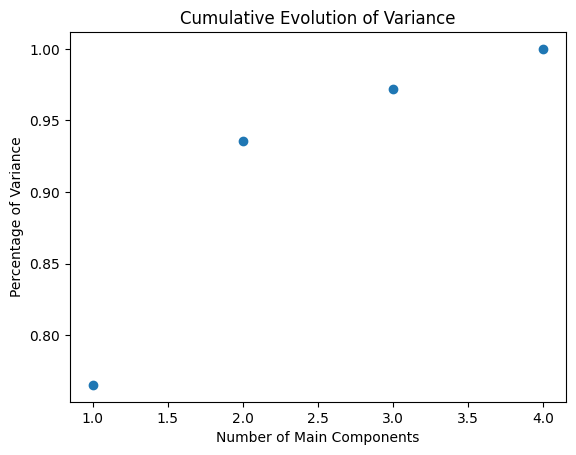

In [7]:
sum_eigval = 3.06107159 + 0.68195288 + 0.14380797 + 0.11316756
perc1 = 3.06107159/sum_eigval
perc2 = 0.68195288/sum_eigval
perc3 = 0.14380797/sum_eigval
perc4 = 0.11316756/sum_eigval

print(f"Percentages: \n{perc1:.2%}\n{perc2:.2%}\n{perc3:.2%}\n{perc4:.2%}")

propacum = np.cumsum(eigval) / np.sum(eigval)

plt.scatter(range(1, len(propacum) + 1), propacum, marker='o')
plt.xlabel('Number of Main Components')
plt.ylabel('Percentage of Variance')
plt.title('Cumulative Evolution of Variance')
plt.show()

Number of principal components do you need to ensure at least 90% variance

In [8]:
propacum = np.cumsum(eigval) / np.sum(eigval)
numcomp = np.argmax(propacum >= 0.9) + 1

print(f"Number of components for 90% variance explained: {numcomp}")


Number of components for 90% variance explained: 2


Indicated vectors to reduce the size of the data by ensuring that the resulting data explained 90% of the variance

In [9]:
maioresVet = eigvec[:, :2]
print(maioresVet)

[[-0.49116408 -0.53238189]
 [-0.50295476 -0.46988715]
 [-0.49414193  0.54115313]
 [-0.51148617  0.45047628]]
